# 네이버 평점 익스 

level 1 


#### imdb 평점 분석 해보는것을 통해 네이버 평점 직관  얻기 


In [773]:
import numpy as np
import tensorflow as tf
import os

In [774]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외



In [775]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


5만개의 영어로 작성된 영화 리뷰 텍스 구성 되어있고 긍정 1 부정 0 label이 달려 있다   
5만개중에 반절씩 나눠서 train test한다  
num_words=10000


num_words  
integer or None. Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data. If None, all words are kept. Defaults to None, so all words are kept.  

imdb.data_load()의 인자로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지를 의미합니다. 예를 들어서 10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉, 단어 집합의 크기는 10,000이 됩니다. 지금은 별도로 제한하지 않겠습니다. 훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력합니다.


In [776]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


1번째 리뷰 데이터에 숫자들 들어있다 이건 토큰화와 정수 인코딩 상태가 끝난상태인것이다 단어 집합 크기를 우리는 10000으로 제한했기 때문에 이보다 큰건 없다 


numpy unique
->unique한 요소를 찾는 함수이다 


np.unique([1, 2, 2, 2, 3, 3, 4]) # array([1, 2, 3, 4])

np.unique([[1, 3, 5],
           [2, 2, 3]]) # array([1, 2, 3, 5])

np.unique(['a', 'b', 3, 5, 'a', '3']) # array(['3', '5', 'a', 'b'], dtype='<U21')


return_countsbool, optional  
If True, also return the number of times each unique item appears in ar.


https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [777]:
# 긍정 부정 평가 레이블 빈도수 확인하기 

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [778]:
word_to_index = imdb.get_word_index()

index_to_word = {index:word for word, index in word_to_index.items()}

    
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


imdb.get_word_index()   

각 단어와 맵핑되는 정수가 저장되어있다 

+3해야 실제 맵핑되는 정수이다 그래서 아래에서 +3하는것이다  0 1 2 3 은 특별 토큰이 들어간다 

In [779]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}  #다시 재할당

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))

<BOS>
4
the
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for

In [780]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [781]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


maxlen은 문장 최대 길이이다 이 값 설정도 모델 성능에 영향을 미친다 -- 이길이를 확인할 필요 있다  


pad_sequences()
전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있습니다. 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

지금 value를 word_to_index "PAD" 있으니까 이게 넣어진다
    

In [782]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)




padding 방식을 문장 뒤쪽(post) 앞쪽(pre)중 어느쪽으로 하느냐에 따라 RNN에 영향 줄수있다 RNN은 pre가 좋다 

이유 : RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다.

### 딥러닝 모델 설계와 훈련 


In [783]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_length=580)) # input_shape=(None,)
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()


Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_74 (Embedding)     (None, 580, 16)           160000    
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 574, 16)           1808      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 114, 16)           0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 16)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_102 (Dense)            (None, 1)               

워드 임베딩 할때 V * N 이야기가 여기서 나온다 (보통 워투벡 임베딩은 skip gram을 한다고 알고있다)
V는 임베딩하려는 단어의 수 vocab size   
N는 은닉층 노드 개수 (사용자 지정) : word_vec_dim 

**Embedding**
>임베딩 층을 만드는 역할이다 지금 W_V * M층을 만드는것이다   
Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.  
>지금 보니까 input dim , output dim만 설정이 되어있다 batch는 none으로 설정하고 있다 그러니까 최종 output shape는 (None,580,16이 되는것이다) 
> input length = maxlen 으로 설정해도 똑같이 나온다 

**MaxPool1D** 

> 지금 maxpool1D(5)되어있으니까 window size는 5인것을 확인할수있다 디폴트로 2가 설정 되어있다  stride같은 경우 defalut가 None인데 이러면 pool size와 같게 설정이 된다 


**Conv1D**

> 1D convolution layer -> 1D로 결과 
>filter, kernel size(1D)


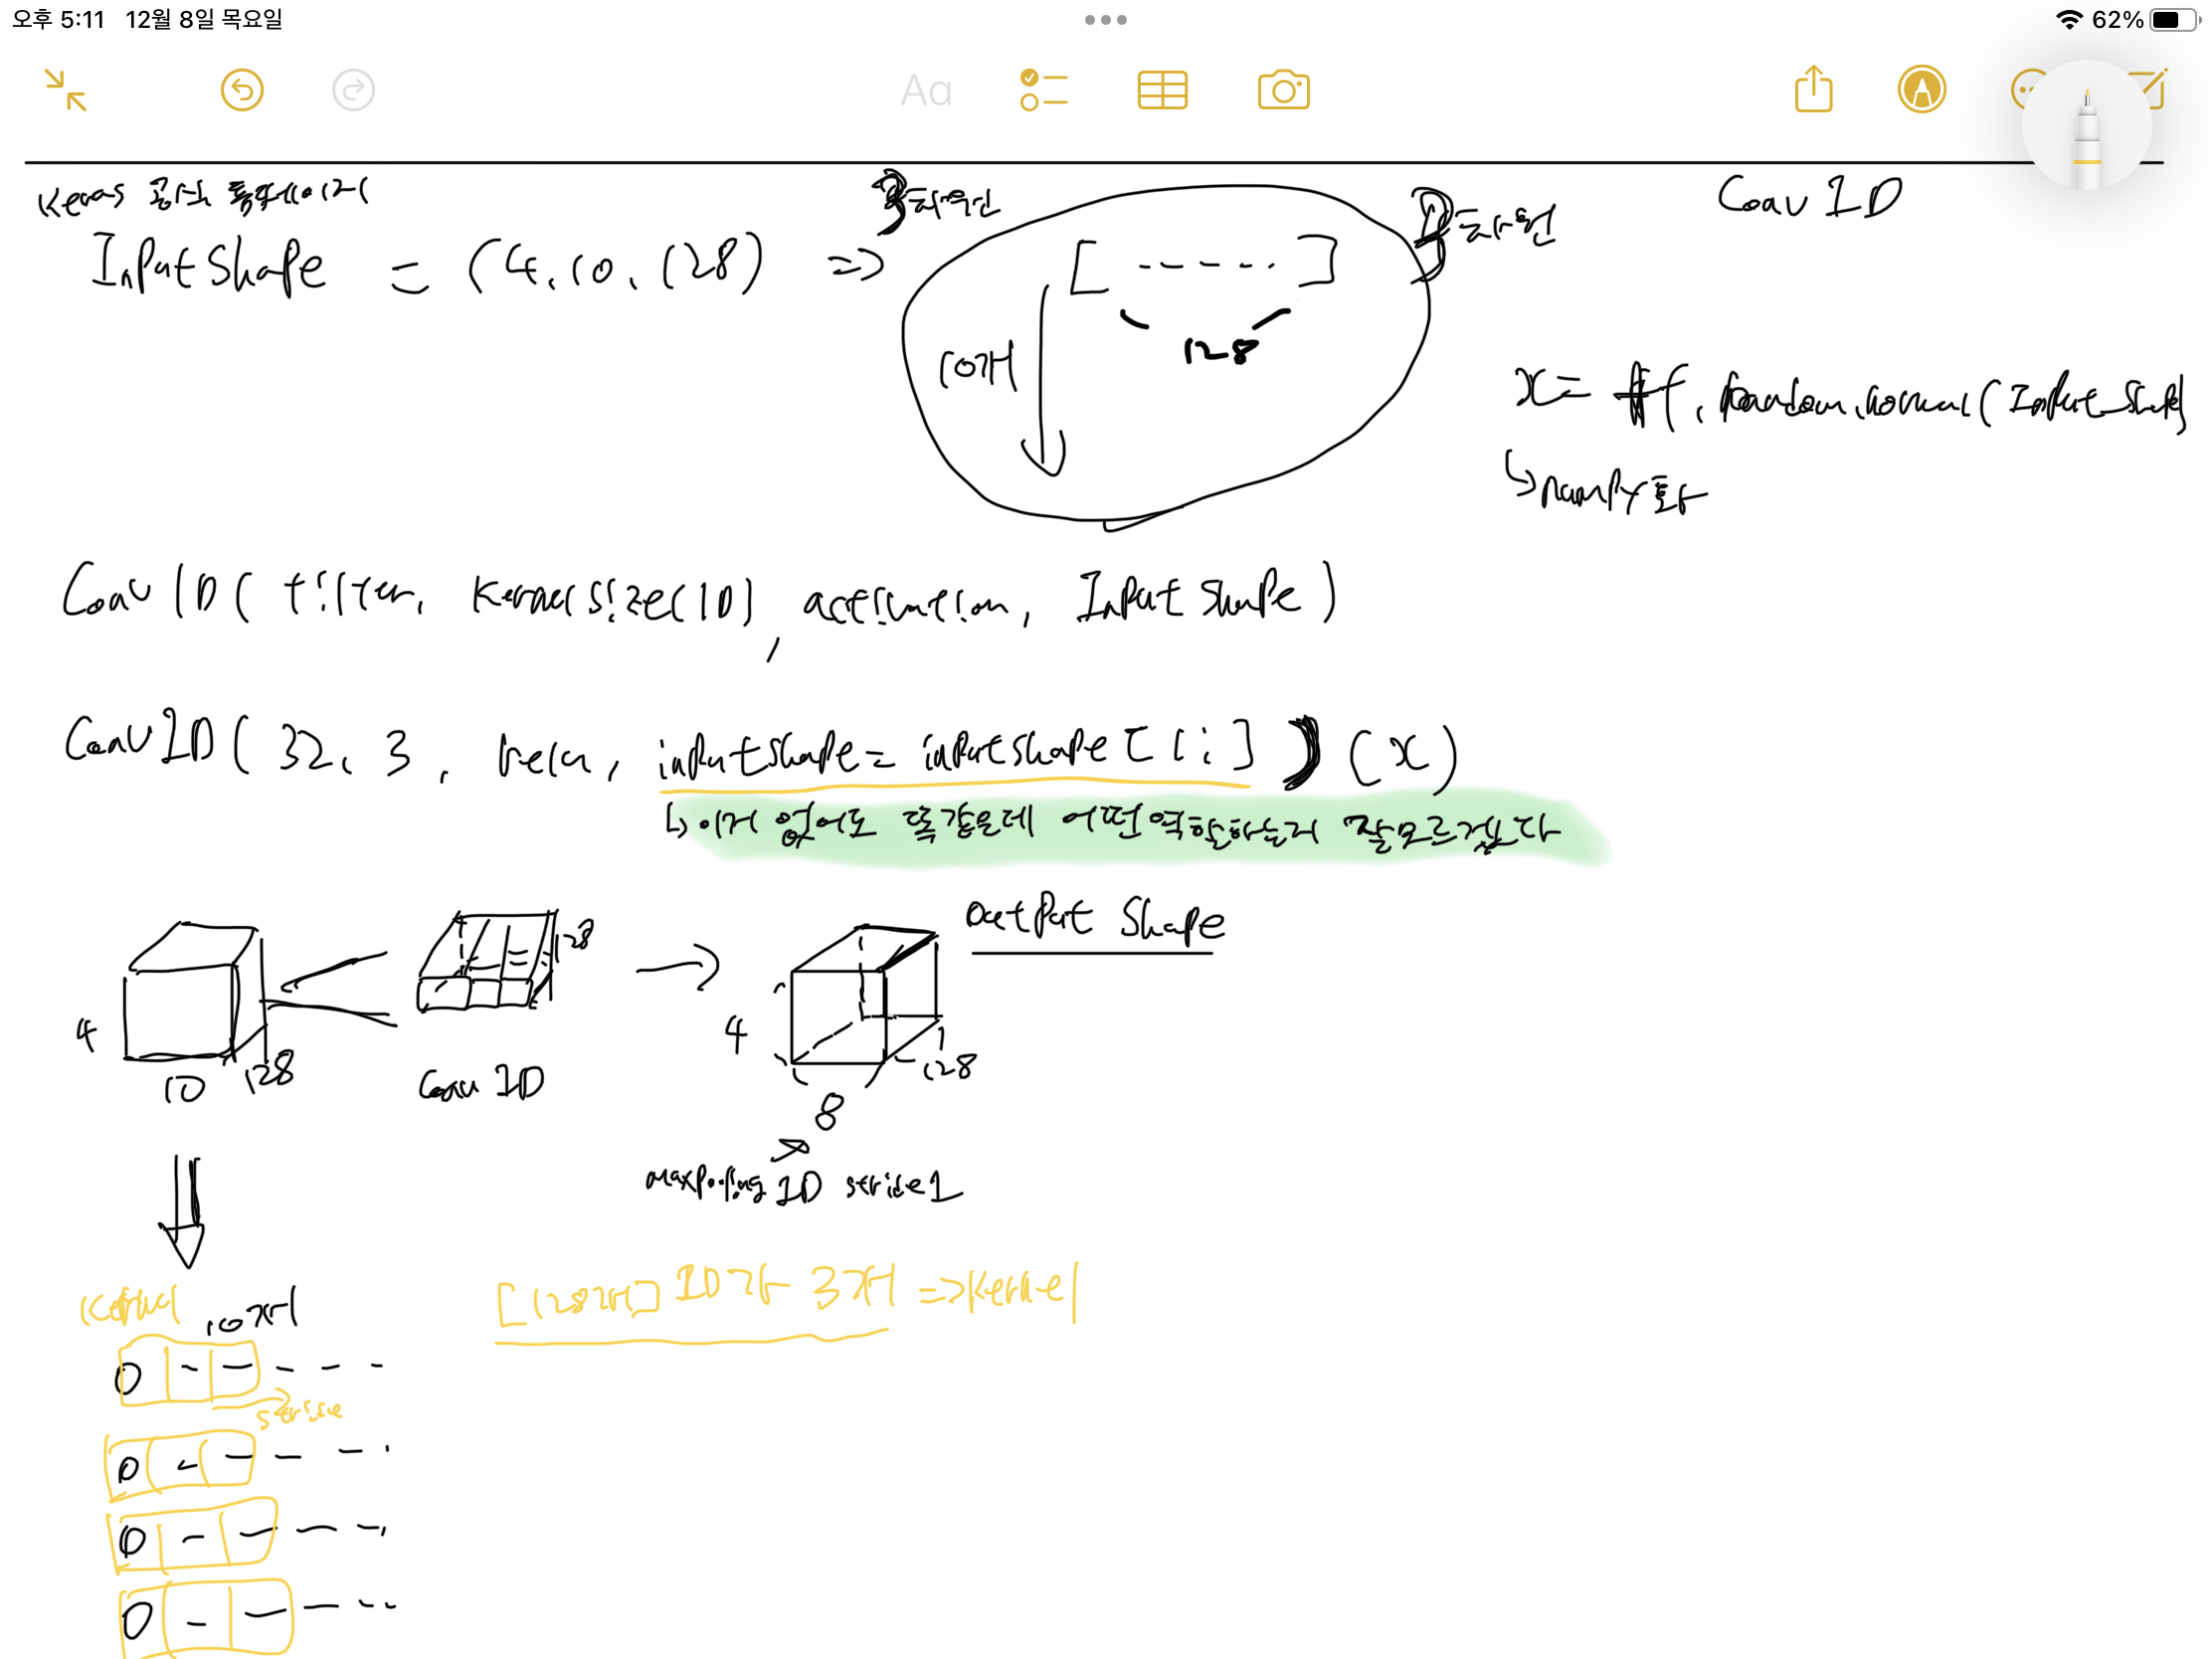
  
  
  

**GlobalMaxPooling1D**
> polling size만큼 보는게 아니라 row 전체를 보았을때 가장 큰거를 선택하는 방식이다   

>x = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])  
x = tf.reshape(x, [3, 3, 1])  
max_pool_1d = tf.keras.layers.GlobalMaxPooling1D()  
max_pool_1d(x)    
 



**Dense(unit,input_dim,activation.....)**  

unit : 출력 뉴런의 수   
input_dim :입력 뉴런의수 (입력의 차원)   
activation : 활성화 함수   


Input shape

N-D tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).

Output shape

N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).









**전체적인 흐름** 


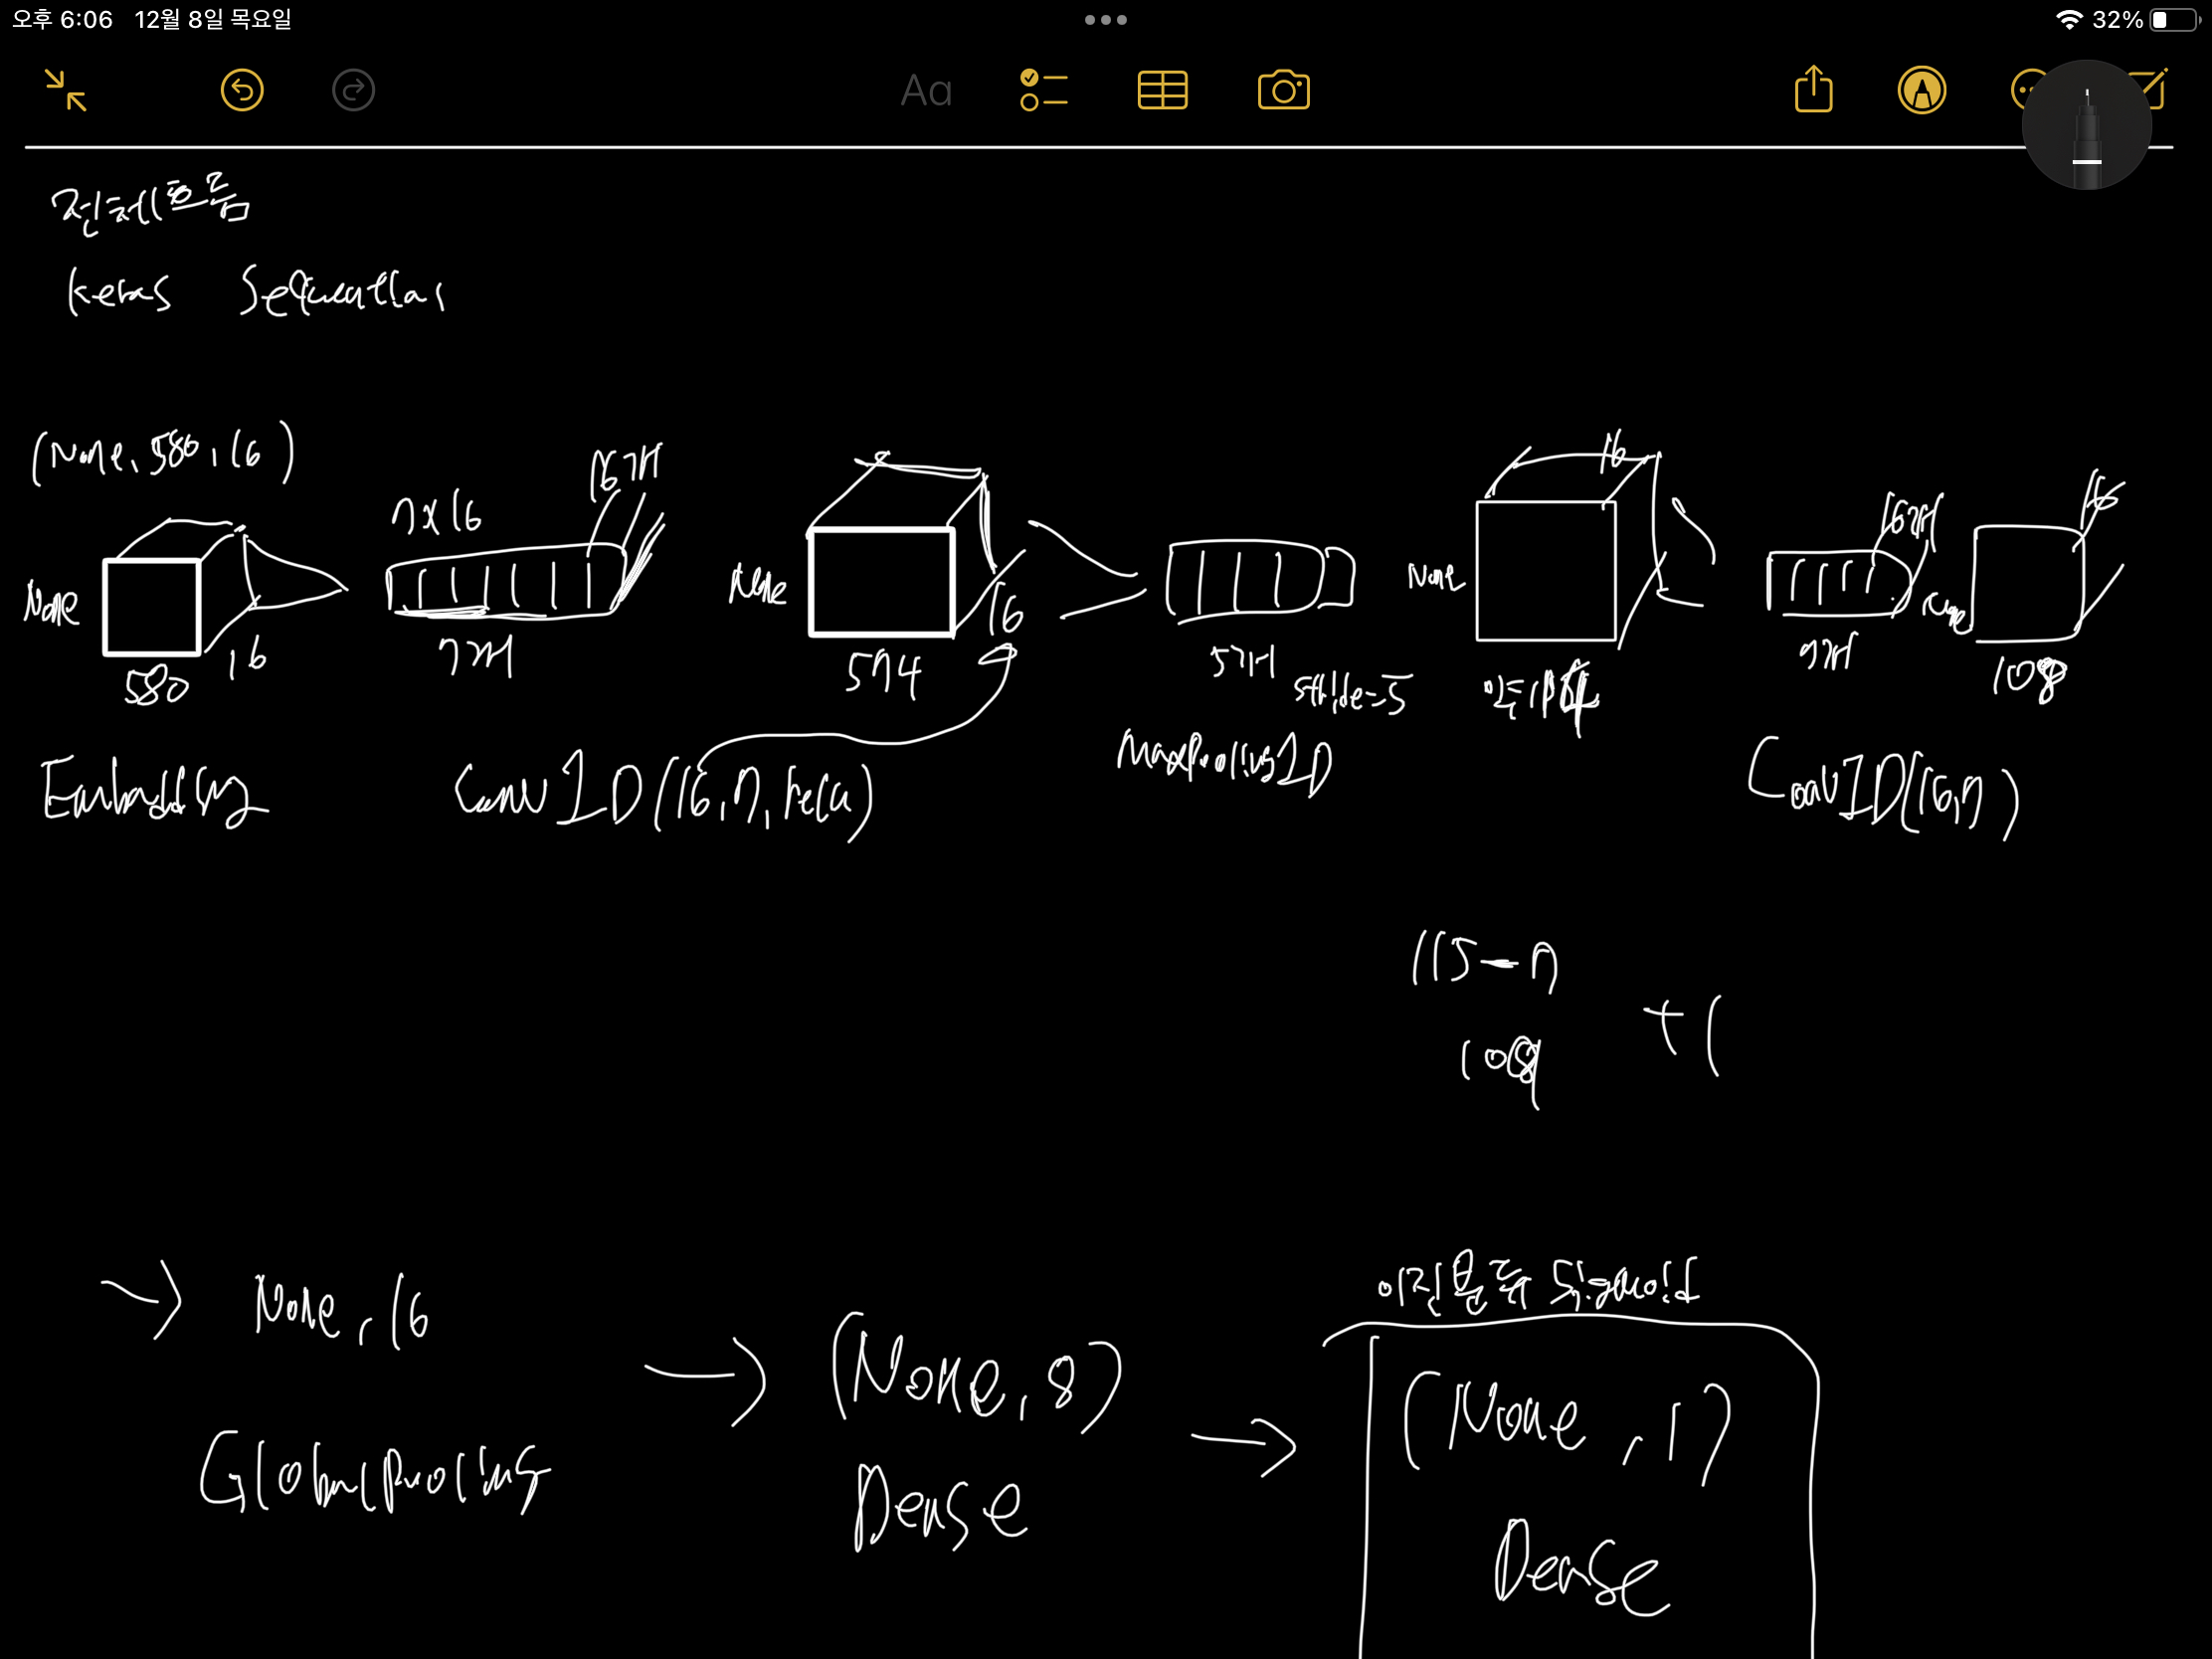


<br>
</br>
<br>
</br>
<br>
</br>
train 데이터에서 validation set 나누기 



In [784]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


##### 모델 학습 하기 


compile단계에서 optimizer,loss function, metrics 설정을 한다 

optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다.  
loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.  
metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.  

훈련 할때 validation set도 같이 설정했다 

In [785]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6930 - accuracy: 0.5102 - val_loss: 0.6923 - val_accuracy: 0.5463
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6877 - accuracy: 0.6292 - val_loss: 0.6828 - val_accuracy: 0.5932
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6355 - accuracy: 0.7579 - val_loss: 0.5592 - val_accuracy: 0.7890
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4200 - accuracy: 0.8508 - val_loss: 0.3517 - val_accuracy: 0.8534
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2517 - accuracy: 0.9036 - val_loss: 0.3301 - val_accuracy: 0.8638
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1790 - accuracy: 0.9376 - val_loss: 0.3323 - val_accuracy: 0.8651
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1249 - accuracy: 0.9631 - val_loss: 0.3490 - val_accuracy: 0.8619
Epoch 8/20
30

evaluate() : 정확도 평가 하기 
첫 번째 인자 : 테스트 데이터 
두번째 인자 : 정답 label test


In [786]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 1s - loss: 0.7909 - accuracy: 0.8269
[0.7909195423126221, 0.8268799781799316]


In [787]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


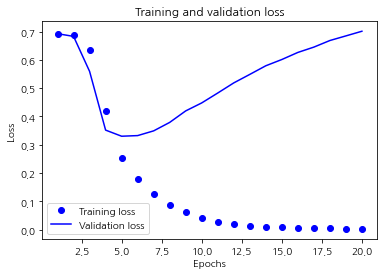

In [788]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

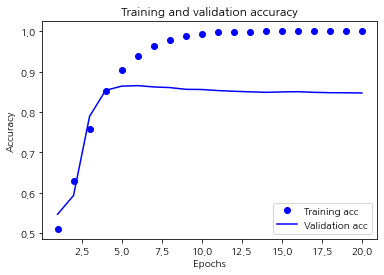

In [789]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## word2vec 적용


In [790]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [791]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [792]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.03452231, -0.01967193, -0.03663513, -0.01572268,  0.03147477,
        0.01428048,  0.02950671,  0.04720781, -0.00757219,  0.02676053,
       -0.00379865,  0.04261972,  0.03307648, -0.00886969,  0.00463163,
       -0.00662986], dtype=float32)

In [793]:
word_vectors.similar_by_word("love")

[('held', 0.8719828724861145),
 ('red', 0.8644859790802002),
 ('muppets', 0.8578405380249023),
 ('deeply', 0.848815381526947),
 ('split', 0.8380839228630066),
 ('ss', 0.8316709995269775),
 ('limits', 0.8232847452163696),
 ('danish', 0.8217898607254028),
 ('captures', 0.8209478259086609),
 ('playwright', 0.8209183216094971)]

# 본격적인 네이버 평점 시작 



In [794]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


In [795]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.tail()

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [796]:
train_data.isnull().sum()


id          0
document    5
label       0
dtype: int64

<br>
</br>
<br>
</br>

train data 크기가 15만 test data가 약 5만 개로 이루어져 있다 

<br>
</br>
<br>
</br>

네이버 평점만을 위한 데이터 가공을 해야 한다 

1. 데이터 중복 제거
2. nan 결측치 제거 
3. 한국어 토크나이저로 토큰화 
4. 불용어 제거 
5. 사전 word to index 구성 
6. 텍스트 스트링을 사전 인덱스 스트링으로 변환 
7. X_train,y train ,x test y test word to index 리턴 

<br>
</br>
<br>
</br>


### Mecab

Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.


형태소(의미를 더이상 나눌수 없는 단위) 분석하기    


* nouns :  명사 추출

* morphs :  형태소 추출

* pos :  품사 부착



### numpy concatenate

Join a sequence of arrays along an existing axis.

배열 합치기 axis =0이면 세로 방향으로 합치고 1이면 가로 방향으로 합친다 

### Counter 

Counter(["hi", "hey", "hi", "hi", "hello", "hey"])  
Counter({'hi': 3, 'hey': 2, 'hello': 1})  


<br>
</br>
<br>
</br>


In [797]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter


tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다',"수","거","좀","것","듯", "때", "게" ,"내", "나", "점", "애", "줄", "번" ,"년"
]

def load_data(train_data, test_data, num_words=10000):
    
    #train_data 결측 제거 
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    print("train size ",len(train_data))
    print("test size ",len(test_data))
    
    # Xtrain Xtest모두 토큰화 해주고 불용어 제거 해준다 
    X_train = []
    i=0
    for sentence in train_data['document']:
        #morphs로 의미 단위 끊고 분석하기 
        temp_X = tokenizer.morphs(sentence) # 토큰화

        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    # 단어 빈도수 확인하기 위해 명사만 따로 토큰화 한다 
    nouns=[]
    for sentence in train_data['document']:
        temp_X = tokenizer.nouns(sentence) # 명사만 토큰화 

        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        nouns.append(temp_X)

    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)

    counter = counter.most_common(10000-4) # 가장 많이 나타난 n개를 가져 온다 단어 빈도수 측정 
    

                                            # 가장 많이 나타난 상위 n개를 word로 선택하는것이다 
    
    vocab = ['', '', '', ''] + [key for key, _ in counter] # 처음 부분 특별 flag처리 + 빈도수 체크 하고 값만 가져 간다 
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train)) # 각 단어들이 인덱스로 바뀌는 부분 
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index,nouns
    
X_train, y_train, X_test, y_test, word_to_index,nouns = load_data(train_data, test_data) 

train size  146182
test size  49157


In [798]:

print(X_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(X_train[0]))
print('2번째 리뷰 문장 길이: ', len(X_train[1]))

[29, 67, 906, 4, 4, 35, 215, 30, 735]
라벨:  0
1번째 리뷰 문장 길이:  9
2번째 리뷰 문장 길이:  16


In [799]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [800]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### 모델 구성을 위한 데이터 분석 및 가공 

* 데이터셋 내 문장 길이 분포 -- 길이 분포 확인하기 
* 적절한 최대 문장 길이 지정 --- maxlen 길이 구하기 
* keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가
* Train , Validation 데이터 셋 나누기 


In [801]:
# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(X_train[0], index_to_word))

더 빙 . . 진짜 짜증 네요 목소리


In [802]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.31268717460415
문장길이 최대 :  116
문장길이 표준편차 :  12.28251529107471
pad_sequences maxlen :  39
전체 문장의 0.9334746261627223%가 maxlen 설정값 이내에 포함됩니다. 


In [803]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index[""],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index[""],
                                                       padding='pre', 
                                                       maxlen=maxlen)


In [804]:
print(X_train.shape)
print(X_test.shape)
print(len(index_to_word))

(146182, 39)
(49157, 39)
9997


# 훈련 데이터의 단어의 빈도수 측정 및 시각화 하기 

이걸 통해 stopword 추가 할수있었다 

In [805]:
import numpy as np
from collections import Counter
#한국어 폰트 사용하기 
plt.rcParams['font.family'] = 'NanumGothic'

nouns = np.concatenate(nouns)


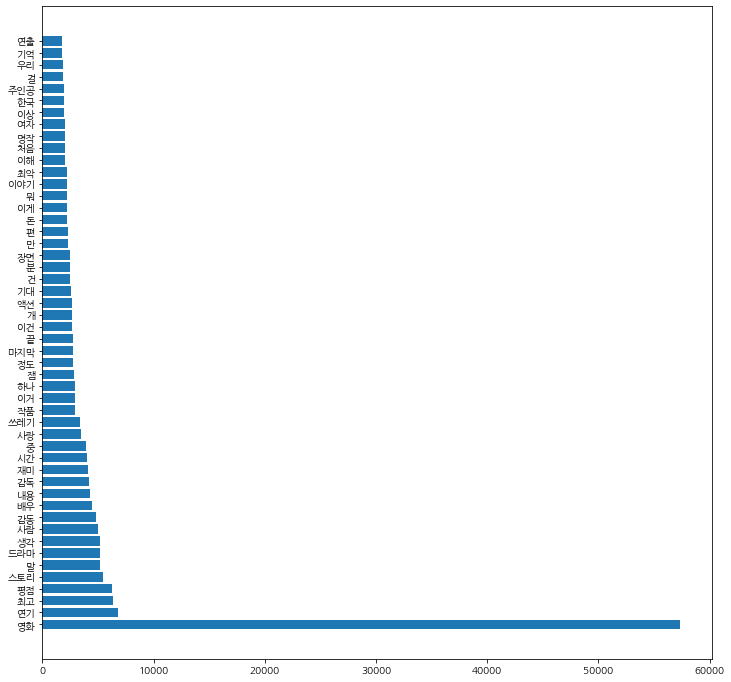

In [806]:
# 훈련 데이터의 단어 빈도수 

train_counter = Counter(nouns)
top_train = dict(train_counter.most_common(50)) # 상위 50개 단어 가져오기 


y_pos = np.arange(len(top_train))

plt.figure(figsize=(12,12))

plt.barh(y_pos,top_train.values())

plt.yticks(y_pos,top_train.keys())
plt.show()

단어 빈도를 통해 stopword추가 할것들 선점 할수있었다 그리고 리뷰 쓸때 ~ 본것 중이라는 표현과 개~ 표현 노잼 꿀잼 등의 단어도 많이 쓰이고 있음을 알수있었다 편 만 분 건 등도 stopword에 추가 할수 있지만 구지 하지는 않았다 지금이 4번째 수정을 하고 있기 때문이다 

### 모델 구성 및 validataion set 구성 

모델 3가지 이상 하기 
1. conv1d
2. LSTM 
3. GRU


### conv1d


In [807]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 32  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_length=maxlen)) # input_shape=(None,)
model.add(tf.keras.layers.Conv1D(32, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(8, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()


Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_75 (Embedding)     (None, 39, 32)            320000    
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 35, 32)            5152      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 3, 8)              1288      
_________________________________________________________________
global_max_pooling1d_22 (Glo (None, 8)                 0         
_________________________________________________________________
dense_103 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_104 (Dense)            (None, 1)               

### LSTM



In [808]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 32  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_length=maxlen)) # input_shape=(None,)

model2.add(tf.keras.layers.LSTM(32))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model2.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_76 (Embedding)     (None, 39, 32)            320000    
_________________________________________________________________
lstm_51 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_105 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 9         
Total params: 328,593
Trainable params: 328,593
Non-trainable params: 0
_________________________________________________________________


### GRU

In [809]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 32  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_length=maxlen)) # input_shape=(None,)


model3.add(tf.keras.layers.GRU(word_vector_dim))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model3.summary()

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_77 (Embedding)     (None, 39, 32)            320000    
_________________________________________________________________
gru_14 (GRU)                 (None, 32)                6336      
_________________________________________________________________
dense_107 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 9         
Total params: 326,609
Trainable params: 326,609
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련 개시 

In [810]:
len(X_train)

146182

In [811]:
# Validation data 분리 하기 


x_val = X_train[:29237]   # 20%만 validation 사용하기 
y_val = y_train[:29237]


partial_x_train = X_train[29237:]  
partial_y_train = y_train[29237:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116945, 39)
(116945,)


### conv1d 훈련

In [812]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
457/457 [==============================] - 3s 5ms/step - loss: 0.4358 - accuracy: 0.7884 - val_loss: 0.3374 - val_accuracy: 0.8511
Epoch 2/20
457/457 [==============================] - 2s 5ms/step - loss: 0.3013 - accuracy: 0.8733 - val_loss: 0.3258 - val_accuracy: 0.8594
Epoch 3/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2511 - accuracy: 0.8981 - val_loss: 0.3322 - val_accuracy: 0.8603
Epoch 4/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2017 - accuracy: 0.9230 - val_loss: 0.3650 - val_accuracy: 0.8528
Epoch 5/20
457/457 [==============================] - 2s 5ms/step - loss: 0.1536 - accuracy: 0.9448 - val_loss: 0.4101 - val_accuracy: 0.8483
Epoch 6/20
457/457 [==============================] - 2s 5ms/step - loss: 0.1140 - accuracy: 0.9617 - val_loss: 0.4668 - val_accuracy: 0.8463
Epoch 7/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0837 - accuracy: 0.9732 - val_loss: 0.5401 - val_accuracy: 0.8431
Epoch 

In [813]:
# Conv1d 모델 평가 
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 1.2868 - accuracy: 0.8195
[1.2867604494094849, 0.8195374011993408]


### LSTM 훈련

In [814]:
optimizer =tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history2 = model2.fit(partial_x_train,partial_y_train, batch_size=256, epochs=20, validation_data=(x_val, y_val),verbose=1)

Epoch 1/20
457/457 [==============================] - 4s 6ms/step - loss: 0.4176 - accuracy: 0.8111 - val_loss: 0.3433 - val_accuracy: 0.8516
Epoch 2/20
457/457 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8624 - val_loss: 0.3381 - val_accuracy: 0.8547
Epoch 3/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2973 - accuracy: 0.8752 - val_loss: 0.3444 - val_accuracy: 0.8497
Epoch 4/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2749 - accuracy: 0.8856 - val_loss: 0.3425 - val_accuracy: 0.8550
Epoch 5/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2514 - accuracy: 0.8956 - val_loss: 0.3461 - val_accuracy: 0.8547
Epoch 6/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2318 - accuracy: 0.9039 - val_loss: 0.3733 - val_accuracy: 0.8509
Epoch 7/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2132 - accuracy: 0.9120 - val_loss: 0.3761 - val_accuracy: 0.8524
Epoch 

In [815]:
# LSTM 모델 평가 
results = model2.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.8164 - accuracy: 0.8280
[0.8163796067237854, 0.8280000686645508]


### GRU 훈련

In [816]:
model3.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [817]:
history3 = model3.fit(partial_x_train,partial_y_train, batch_size=256, epochs=20, validation_data=(x_val, y_val),verbose=1)

Epoch 1/20
457/457 [==============================] - 4s 7ms/step - loss: 0.4180 - accuracy: 0.8096 - val_loss: 0.3541 - val_accuracy: 0.8458
Epoch 2/20
457/457 [==============================] - 3s 6ms/step - loss: 0.3407 - accuracy: 0.8541 - val_loss: 0.3406 - val_accuracy: 0.8508
Epoch 3/20
457/457 [==============================] - 3s 6ms/step - loss: 0.3226 - accuracy: 0.8629 - val_loss: 0.3328 - val_accuracy: 0.8551
Epoch 4/20
457/457 [==============================] - 3s 6ms/step - loss: 0.3089 - accuracy: 0.8703 - val_loss: 0.3306 - val_accuracy: 0.8569
Epoch 5/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2953 - accuracy: 0.8754 - val_loss: 0.3237 - val_accuracy: 0.8615
Epoch 6/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2826 - accuracy: 0.8814 - val_loss: 0.3183 - val_accuracy: 0.8641
Epoch 7/20
457/457 [==============================] - 3s 6ms/step - loss: 0.2709 - accuracy: 0.8869 - val_loss: 0.3172 - val_accuracy: 0.8653
Epoch 

In [818]:
# GRU 모델 평가 
results = model3.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3643 - accuracy: 0.8535
[0.3643159568309784, 0.8534898161888123]


### loss Accuracy 그래프 시각화 

In [819]:
# Conv1d 모델 loss , Accuracy 


def training_validate_loss_acc(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo"는 "파란색 점"입니다
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [820]:

history_dict = history.history
history_dict2 = history2.history
history_dict3 = history3.history


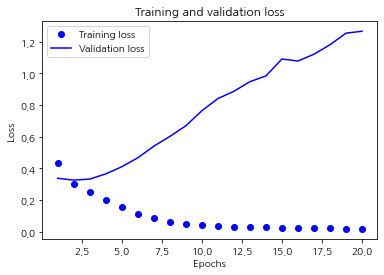

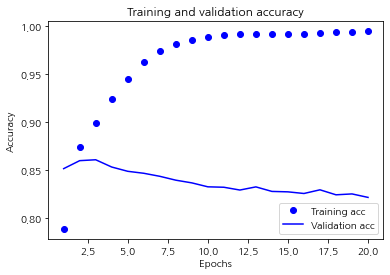

In [821]:
training_validate_loss_acc(history_dict)

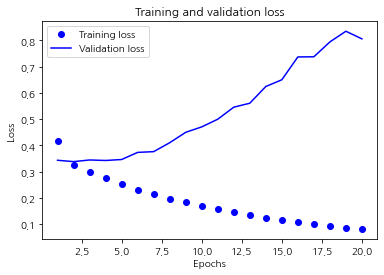

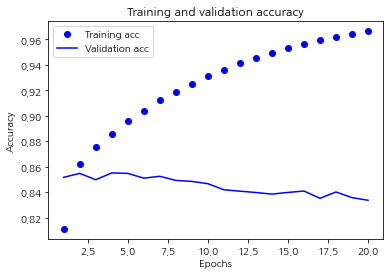

In [822]:
training_validate_loss_acc(history_dict2)

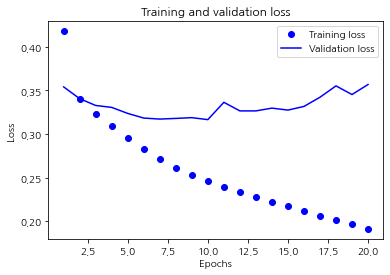

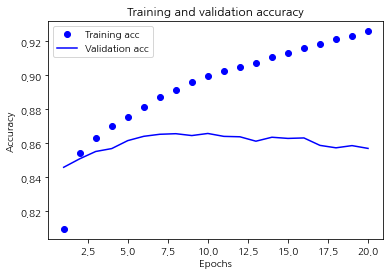

In [823]:
training_validate_loss_acc(history_dict3)

3가지 다 보니까 validation과 train 나눠 지는 지점 이 에폭 한 5 - 6 사이니까 이때가 좋은것 같다 하지만 validation나눌때 그냥 나누기만 했기 때문에 즉 random shuffle 또 비율 또한 일정하게 나눠지지 않았기 때문에 단순히 이게 최종은 아닌것 같다 


### 학습된 embedding 레이어 분석 

### cov1d embedding layer 분석 


In [824]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 32)


In [825]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [826]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [827]:
word_vectors.similar_by_word("사랑")

[('아련', 0.816196858882904),
 ('시네마', 0.793363630771637),
 ('안다', 0.791767954826355),
 ('더한', 0.7879837155342102),
 ('자세', 0.7789353132247925),
 ('멋져', 0.7738389372825623),
 ('흐르', 0.7733206748962402),
 ('개꿀', 0.7667984962463379),
 ('고마워요', 0.7636102437973022),
 ('고파', 0.7566084861755371)]

### LSTM embedding layer 분석 


In [828]:
embedding_layer = model2.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 32)


In [829]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec2.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [830]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [831]:
word_vectors.similar_by_word("사랑")

[('아련', 0.816196858882904),
 ('시네마', 0.793363630771637),
 ('안다', 0.791767954826355),
 ('더한', 0.7879837155342102),
 ('자세', 0.7789353132247925),
 ('멋져', 0.7738389372825623),
 ('흐르', 0.7733206748962402),
 ('개꿀', 0.7667984962463379),
 ('고마워요', 0.7636102437973022),
 ('고파', 0.7566084861755371)]

### GRU embedding layer 분석 


In [832]:
embedding_layer = model3.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 32)


In [833]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec3.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [834]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [835]:
word_vectors.similar_by_word("사랑")

[('아련', 0.816196858882904),
 ('시네마', 0.793363630771637),
 ('안다', 0.791767954826355),
 ('더한', 0.7879837155342102),
 ('자세', 0.7789353132247925),
 ('멋져', 0.7738389372825623),
 ('흐르', 0.7733206748962402),
 ('개꿀', 0.7667984962463379),
 ('고마워요', 0.7636102437973022),
 ('고파', 0.7566084861755371)]

셋다 같은 단어에 대해 비슷한 결과가 나온다 

### 한국어 word2vec 임베딩 활용하여 성능 개선 


한국어 Word2Vec은 /data 폴더 안에 있는 word2vec_ko.model을 활용하세요.
한국어 Word2Vec을 활용할 때는 load_word2vec_format() 형태가 아닌 load() 형태로 모델을 불러와주세요. 또한 모델을 활용할 때에는 아래 예시와 같이 .wv를 붙여서 활용합니다. 좀더 자세한 활용법에 대해선 다음 링크들을 참조해주세요. 참고 링크1, 참고 링크2

from gensim.models.keyedvectors import Word2VecKeyedVectors


In [836]:
 os.getenv('HOME')

'/aiffel'

In [837]:

from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors

word2vec_path =os.getenv('HOME')+'/data/word2vec_ko.model'
word_vectors =gensim.models.Word2Vec.load(word2vec_path)


In [838]:
word_vectors.wv.similar_by_word("사랑")

[('이별', 0.7626414895057678),
 ('행복', 0.7550068497657776),
 ('슬픔', 0.7381505966186523),
 ('유혹', 0.7238055467605591),
 ('그리움', 0.7167419195175171),
 ('추억', 0.7143999338150024),
 ('꿈', 0.7089294195175171),
 ('애정', 0.7066588997840881),
 ('포옹', 0.7034594416618347),
 ('마음', 0.6972615718841553)]

# 한국어 임베딩 한 이후 3가지 모델로 성능 개선해 보기 

In [839]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

for i in range(4,vocab_size):
    if index_to_word[i] in word_vectors.wv:
        embedding_matrix[i] = word_vectors.wv[index_to_word[i]]



### conv1d


In [840]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim,embeddings_initializer=Constant(embedding_matrix),input_length=maxlen,trainable=True)) # input_shape=(None,)

model.add(tf.keras.layers.Conv1D(32, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_78 (Embedding)     (None, 39, 100)           1000000   
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 35, 32)            16032     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 3, 16)             2576      
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 16)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_110 (Dense)            (None, 1)               

### LSTM



In [841]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim,embeddings_initializer=Constant(embedding_matrix),input_length=maxlen,trainable=True)) # input_shape=(None,)

model2.add(tf.keras.layers.LSTM(100))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model2.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_79 (Embedding)     (None, 39, 100)           1000000   
_________________________________________________________________
lstm_52 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_111 (Dense)            (None, 8)                 808       
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 9         
Total params: 1,081,217
Trainable params: 1,081,217
Non-trainable params: 0
_________________________________________________________________


### GRU

In [842]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim,embeddings_initializer=Constant(embedding_matrix),input_length=maxlen,trainable=True)) # input_shape=(None,)


model3.add(tf.keras.layers.GRU(word_vector_dim))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model3.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_80 (Embedding)     (None, 39, 100)           1000000   
_________________________________________________________________
gru_15 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_113 (Dense)            (None, 8)                 808       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 9         
Total params: 1,061,417
Trainable params: 1,061,417
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련 개시 

In [843]:
len(X_train)

146182

In [844]:
# Validation data 분리 하기 


x_val = X_train[:29237]   # 20%만 validation 사용하기 
y_val = y_train[:29237]


partial_x_train = X_train[29237:]  
partial_y_train = y_train[29237:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116945, 39)
(116945,)


### conv1d 훈련

In [845]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=3  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/3
914/914 [==============================] - 5s 5ms/step - loss: 0.5181 - accuracy: 0.7408 - val_loss: 0.4262 - val_accuracy: 0.8032
Epoch 2/3
914/914 [==============================] - 4s 5ms/step - loss: 0.3844 - accuracy: 0.8285 - val_loss: 0.3740 - val_accuracy: 0.8347
Epoch 3/3
914/914 [==============================] - 4s 5ms/step - loss: 0.3336 - accuracy: 0.8551 - val_loss: 0.3525 - val_accuracy: 0.8458


In [846]:
# Conv1d 모델 평가 
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3623 - accuracy: 0.8412
[0.3623427748680115, 0.8411619663238525]


### LSTM 훈련

In [847]:
optimizer =tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history2 = model2.fit(partial_x_train,partial_y_train, batch_size=128, epochs=3, validation_data=(x_val, y_val),verbose=1)

Epoch 1/3
914/914 [==============================] - 7s 6ms/step - loss: 0.4320 - accuracy: 0.7962 - val_loss: 0.3586 - val_accuracy: 0.8410
Epoch 2/3
914/914 [==============================] - 5s 6ms/step - loss: 0.3198 - accuracy: 0.8607 - val_loss: 0.3250 - val_accuracy: 0.8581
Epoch 3/3
914/914 [==============================] - 5s 6ms/step - loss: 0.2792 - accuracy: 0.8817 - val_loss: 0.3168 - val_accuracy: 0.8638


In [848]:
# LSTM 모델 평가 
results = model2.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3265 - accuracy: 0.8587
[0.32652783393859863, 0.8586569428443909]


### GRU 훈련

In [849]:
model3.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [850]:
history3 = model3.fit(partial_x_train,partial_y_train, batch_size=128, epochs=3, validation_data=(x_val, y_val),verbose=1)

Epoch 1/3
914/914 [==============================] - 8s 7ms/step - loss: 0.4449 - accuracy: 0.7899 - val_loss: 0.3647 - val_accuracy: 0.8385
Epoch 2/3
914/914 [==============================] - 6s 6ms/step - loss: 0.3378 - accuracy: 0.8518 - val_loss: 0.3263 - val_accuracy: 0.8567
Epoch 3/3
914/914 [==============================] - 6s 6ms/step - loss: 0.2999 - accuracy: 0.8718 - val_loss: 0.3176 - val_accuracy: 0.8612


In [851]:
# GRU 모델 평가 
results = model3.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3225 - accuracy: 0.8602
[0.32248619198799133, 0.8601623177528381]


### loss Accuracy 그래프 시각화 

에폭 2에서 대부분 갈라지니까 여기서는 약 에폭 3로 해보겠다 

In [852]:
# Conv1d 모델 loss , Accuracy 


def training_validate_loss_acc(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo"는 "파란색 점"입니다
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [853]:

history_dict = history.history
history_dict2 = history2.history
history_dict3 = history3.history


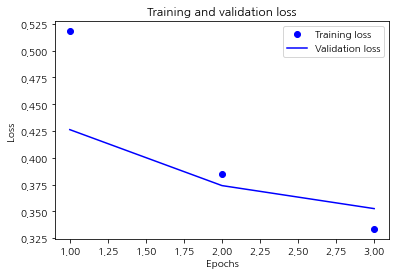

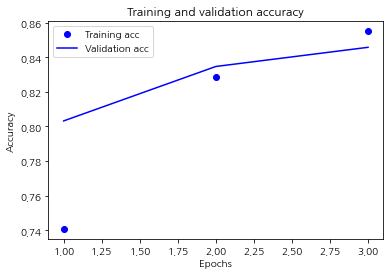

In [854]:
training_validate_loss_acc(history_dict)

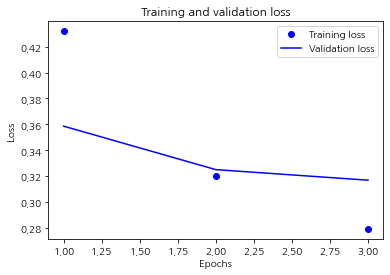

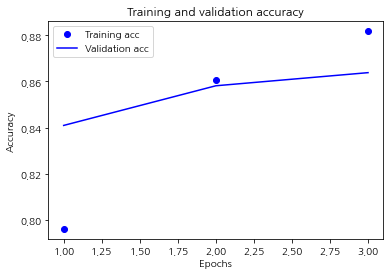

In [855]:
training_validate_loss_acc(history_dict2)

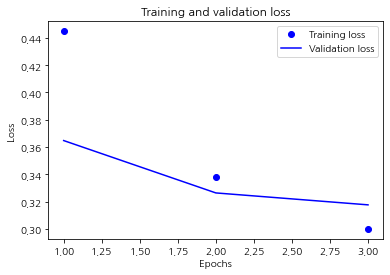

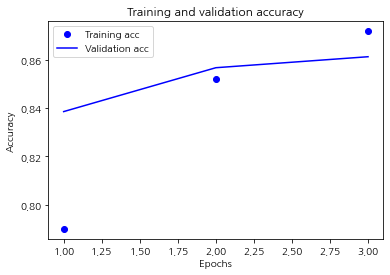

In [856]:
training_validate_loss_acc(history_dict3)

3가지 다 보니까 validation과 train 나눠 지는 지점 이 에폭 한 5 - 6 사이니까 이때가 좋은것 같다 하지만 validation나눌때 그냥 나누기만 했기 때문에 즉 random shuffle 또 비율 또한 일정하게 나눠지지 않았기 때문에 단순히 이게 최종은 아닌것 같다 


### 학습된 embedding 레이어 분석 

### cov1d embedding layer 분석 


In [857]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 100)


In [858]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [859]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [860]:
word_vectors.similar_by_word("사랑")

[('이별', 0.7628293633460999),
 ('행복', 0.7530711889266968),
 ('슬픔', 0.7437385320663452),
 ('그리움', 0.7239561676979065),
 ('추억', 0.7223896384239197),
 ('유혹', 0.7148380279541016),
 ('애정', 0.7130703926086426),
 ('꿈', 0.7102929353713989),
 ('마음', 0.7088655233383179),
 ('엄마', 0.6997073888778687)]

### LSTM embedding layer 분석 


In [861]:
embedding_layer = model2.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 100)


In [862]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec2.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [863]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [864]:
word_vectors.similar_by_word("사랑")

[('이별', 0.7628293633460999),
 ('행복', 0.7530711889266968),
 ('슬픔', 0.7437385320663452),
 ('그리움', 0.7239561676979065),
 ('추억', 0.7223896384239197),
 ('유혹', 0.7148380279541016),
 ('애정', 0.7130703926086426),
 ('꿈', 0.7102929353713989),
 ('마음', 0.7088655233383179),
 ('엄마', 0.6997073888778687)]

### GRU embedding layer 분석 


In [865]:
embedding_layer = model3.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 100)


In [866]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec3.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [867]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)


In [868]:
word_vectors.similar_by_word("사랑")

[('이별', 0.7628293633460999),
 ('행복', 0.7530711889266968),
 ('슬픔', 0.7437385320663452),
 ('그리움', 0.7239561676979065),
 ('추억', 0.7223896384239197),
 ('유혹', 0.7148380279541016),
 ('애정', 0.7130703926086426),
 ('꿈', 0.7102929353713989),
 ('마음', 0.7088655233383179),
 ('엄마', 0.6997073888778687)]

셋다 역시 같은 단어에 대해 비슷한 결과가 나온다 

conv1D -> 83  
LSTM GRU -> 86   



# 회고 



이번 네이버 평점 리뷰는 train 15만 test 5만개로 이루어져 있었다 Mecab을 통해 형태소 분리를 했다 Xtrain Xtext에 morph해서 형태소 분리 하고 불용어 없애 주었다   

또한 norn을 써서 명사들만 따로 모아서 단어 빈도수를 시각화 까지 진행하였다   

네이버 평점에서 word_to_index는 상위 n개의 word를 먼저 선택하고 word와 index 딕셔너리로 변환해준것이고 index to word는 반대이다 
각각의 단어가 인덱스로 묶여 있으니까 Xtrain 의 숫자를 단어로 변환 가능하다 이런식으로 임베딩 되어있다   

X_train은 형태소로 분리된 단어와 word_to_index와 대응해서 list로 만든다 X_test도 마찬가지이다   

또한 maxlen을 알아내는게 중요하다 왜냐하면 모든 문장의 길이가 일정하지 않기 때문이다   
그래서 pad_sequnces가 필요하다 빈 자리는 공백으로 채워 주었다    
  
그리고 단어 빈도수를 따로 측정해서 시각화 했다 불용어 추가 할수있었고 리뷰 패턴도 어느정도 파악할수있었다   
자세한건 코드 사이마다 마크다운으로 설명을 적어놓았다   

이제 모델링하는데 conv1d LSTM GRU 3가지를 사용했다 LSTM, GRU같은 경우 층을 쌓을수록 성능이 좋을것으로 예상하고   
여러가지 파라미터 조정하고 층쌓는 실험을 했는데 결국에는 단일로 처리하는게 가장 좋았다 그리고  loss, acc그래프 그려보면 train과 validation갈라지는 부분이있다 
이때의 에폭이 가장 최적이므로 이 에폭으로 맞추면 좋다 하지만 전체적인 경향을 보기 위해 일부로 상대적으로 큰 에폭으로 설정했다   
역시 자세한 설명은 코드 중간에 마크 다운으로 적었다   


그리고 임베딩 레이어 분석해본 결과 3가지 모두 비슷한 결과를 뽑을수있었다 하지만 전혀 관계 없어 보였다   
그래서 한국어 임베딩을 진행해보았고 진행 하고 모델까지 해보니까 훨씬 단어에 유사한 단어를 뽑아내는것을 확인할수있었다   
  


아래는 총 느낀점과 여러가지 실험한 내용에 대한 내용이 있다   


전체적인 RNN CNN LSTM GRU 흐름 직접 따라 갈수있었다   
여러가지 파라미터 실험 해볼수있었다   
임베딩에 따라 성능 차이가 많이 난다는것을 느낌   
임베딩 방법 직관적으로 알수있었다 그리고 시각화 하는 법도 하지만 여전히 부족한 부분 있다 그건 나중에 업데이트 하겠다 




LSTMM에 층을 쌓을수록 성능이 좋아진다고 해서 해봤는데 아래와 같은 생각 보다 별로라서 dropout 0.2로 조정 해줌 

층 구성은 512->256->128->64로  LSTM 구성 했다 



1. 층은 그대로 dropout이 0.4 일때 

	Epoch 50/50
457/457 [==============================] - 28s 61ms/step - loss: 0.5094 - accuracy: 0.6509 - val_loss: 0.7931 - val_accuracy: 0.5930



2. 층은 그대로 dropout 0.2조정



Epoch 30/30
457/457 [==============================] - 26s 56ms/step - loss: 0.5068 - accuracy: 0.6527 - val_loss: 0.7911 - val_accuracy: 0.5960
별차이 없음



3. 그냥  한개만 했을때 
Epoch 30/30
457/457 [==============================] - 3s 6ms/step - loss: 0.0314 - accuracy: 0.9883 - val_loss: 1.1396 - val_accuracy: 0.8340

1537/1537 - 3s - loss: 1.1632 - accuracy: 0.8274
성능 더 좋았다   


LSTM GRU
모두 hidden layer 개수 줄였을때가 더 좋았다 그리고 그래프 그려보니까 에폭 5-69사이가 좋은듯했다 왜냐하면 그래프 보면 이해 가능하다   
그림 보면 에폭 2일때가 갈라지는 부분이다 위에는 그냥 20으로 했다 그래야 전체적인 그래프가 보이니까 
하지만 에폭 2로 했을때 성능이 좋게 나옴 성능 가장 좋게 나올때 임베딩레이어 분석 해봐도 세 모델 모두 비슷한 결과를 보였다 


그리고 한국어 임베딩 했을때는 최적의 에폭을 적용해서 성능을 올렸다 
결과적으로 LSTM GRU 모두 86의 성능을 도출 할수있었다 


